<a href="https://colab.research.google.com/github/edakass/siniflandirma_classification/blob/main/Siniflandirma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Drive' a bağlanmak için
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
import os
os.chdir('/gdrive/My Drive/Siniflandirma/Siniflandirma')

In [4]:
!ls

test  train  Untitled


In [5]:
!pip3 install -q keras

In [6]:
# Kütüphaneler
#Modüller import komutuyla içe aktarılır

import os 
#Dosyamıza erişmek ve dosyadaki  klasörleri göstermek için kullanılır.

import cv2
#Tüm görüntü işleme işlemlerinde kullanılan 

import numpy as np
#Hesaplar/Hesaplama yapmak için temel pakettir.Matematik işlemler için kullanılır.

import pandas as pd 
#Python için yüksek performanslı,kullanımı kolay veri yapıları ve veri analizleri için kullanılan kütüphane.

import matplotlib.pyplot as plt
#Grafik çizme paketi,veri görselleştirmek için kullanılan kütüphane.

from glob import glob #temel olarak programızın dosya sistemindeki dosyaların bir listesini araması gerektiğinde
#ve bu dosyaların adlarının araması gerektiğinde ve bu dosyların bir kalıpla eşleştiğinde,glob yardımcı olur.
#(Unix stili yol adı desen genişletmesi)

from keras.models import Sequential 
#Keras nedir=Pythonda yazılmış CPU ve GPU'da sorunsuz olarak çalışabilen açık kaynaklı bir sinir ağı kütüphanesidir.

from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
#Bunları yazılmış oldukları yerlerde açıklayacağım.

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
#Görsellerle işlem yapma

from PIL import Image
#PIL formatındaki bir resmi bir numpy dizisine dönüştürür.

import tensorflow as tf

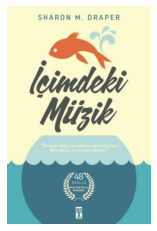

In [7]:
# directory = dizinler
#dizin=Dizin veya klasör,dosyalar ve alt dizinlerden oluşan bir koleksiyondur
train_dir = "train/" #burada dosyamızın yolunu veriyoruz
test_dir = "test/"

img = load_img(train_dir + "Roman/Roman_8.jpg") #yükleyeceğimiz dosyanın konumunu ve türünü veriyoruz
img2 = load_img(test_dir + "Kolye/Kolye_7.jpg") #yükleyeceğimiz dosyanın konumunu ve türünü veriyoruz
plt.imshow(img) #resmi gösteriyoruz
plt.axis("off") #grafiğin x y eksenini siliyor

#plt.imshow(img2) #resmi gösteriyoruz
#plt.axis("off") #grafiğin x y eksenini siliyor

plt.show() #resmi gösteriyoruz

In [8]:
x = img_to_array(img)
print(x.shape) #Resmin görümü

(512, 338, 3)


In [9]:
x = img_to_array(img2)
print(x.shape) 

(1200, 1200, 3)


In [10]:
x.ndim

3

In [11]:
x = img_to_array(img)
print(x.ndim)
#3 boyutlu yani 3 kanallı görüntüler var

3


In [12]:
className = glob(train_dir + '/*' )
numberOfClass = len(className)
print("NumberOfClass /Sınıf Sayısı: ",numberOfClass) #kaç tane sınıfımızın olduğunu söylüyor


NumberOfClass /Sınıf Sayısı:  2


In [13]:
import random

In [14]:
filenames = os.listdir("train/Roman/")

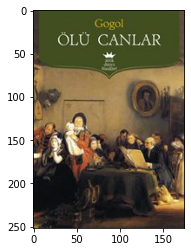

In [15]:

sample = random.choice(filenames)
image = load_img("train/Roman/"+sample)
plt.imshow(image)

In [16]:
filenames = os.listdir("test/Kolye/")

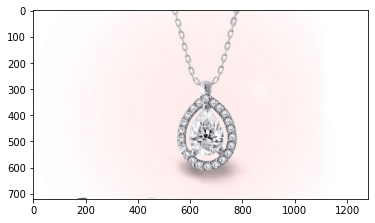

In [17]:

sample = random.choice(filenames)
image = load_img("test/Kolye/"+sample)
plt.imshow(image)

In [18]:
# Veri Çıktıları için
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

print("Train için :")
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200)
        )
print("Test için : ")
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(200, 200))


Train için :
Found 174 images belonging to 2 classes.
Test için : 
Found 32 images belonging to 2 classes.


In [19]:
# model oluşturma işlemi

model = Sequential()  #ESA'nın Keras ile temel yapısının oluşturulması.(ESA-Evrişimli Sinir Ağı)
#Sıralı boş model

#1.gizli katman 
model.add(Conv2D(32,(3,3),input_shape=(200,200,3))) 
#32 adet filtreden oluşan 3x3 boyutunda,modelimize bir 2 boyutlu Convolutional Katman(layer) ekler.
#İlk parametresi kaç adet filtrenin bu katmanda kullanılacağıdır.İkinci parametre filtrenin/kernelin boyutudur.
#Bu modelin ilk katmanı olduğu için input_shape vermemiz gerekli,boş bırakılırsa compile edilirken hata verecektir.
model.add(Activation("relu")) 
#aktivasyon fonksiyonunu belirledik,yani hangi fonksiyonu kullanacağımızı,mesela sigmoid i de örnek verebiliriz.

#2.Gizli Katman(hidden layer)
model.add(MaxPooling2D()) #Ortaklama katmanı
#Maxpooling işlemi,verimizden,verilen pool_size boyutunda kümeler alıp bu kümeler içerisindeki en büyük değerleri kullanarak
#yeni bir  matris oluşturur.Oluşan matrisin boyutu daha küçüldüğü için sonraki katmanlarda işlem hızımızı artıracaktır.
#Ayrıca bu  MaxPoolşng overfit durumunun önüne geçer.
model.add(Conv2D(64,(3,3)))

#3.gizli katman
model.add(Activation("relu"))
model.add(MaxPooling2D())  #Ortaklama katmanı
model.add(Conv2D(128,(3,3)))

#4.gizli katman
model.add(Activation("relu"))
model.add(MaxPooling2D())  #Ortaklama katmanı
model.add(Flatten()) #Düzleştirme
model.add(Dense(256))
##Bir standart  ysa katmanı oluşturur.İlk parametrede verilen sayı kadar nöron barındırır.
model.add(Activation("relu"))
#model.add(Dropout(0.6)) 
#her katmanda dropout uygulamamıza gerek yok


#Output layer/Çıkış Katmanı
model.add(Dense(numberOfClass)) #Sınıfımızın sayısı  kadar dense olması gerekiyor
model.add(Activation("softmax")) #Output aktivasyon fonksiyonu olarak "softmax" 'dir.
#Sınıflama işlemi

#Modeli özetlemek için
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 97, 97, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       7

In [20]:
# Model Derleme İşlemi
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam", #Ağırlıkları optimize etmek için Adam algoritması kullanılır.
              metrics = ["accuracy"])

#loss-Kayıp Fonksiyonu-->Ağımızın eğitim veri seti üzerinde kendi performasını gözlemlemesi ve böylece kendi kendine  doğru yolu bulabilmesi için
#optimizer-Optimization-Eniyileme->Ağımızın girdisi olan veri ile oluşturduğukaybı göz önünde bulundurarak kendisini güncelleme mekanizması.

##ilk olarak optimizasyon fonksiyonumuzu belirledik, loss kayıp fonksiyonumuzu belirledik, 
#metrics algoritmanın doğru yada yanlış yaptığını anlamasını sağlayacak yöntemi belirledik.


In [21]:

hist = model.fit(
      train_generator,
      steps_per_epoch=5,
      epochs=20,
      validation_data=validation_generator
      )

                     

Epoch 1/20
5/5 [==============================] - 64s 7s/step - loss: 5.1627 - accuracy: 0.4424 - val_loss: 0.5871 - val_accuracy: 0.7188
Epoch 2/20
5/5 [==============================] - 3s 542ms/step - loss: 0.7443 - accuracy: 0.5990 - val_loss: 0.5255 - val_accuracy: 0.9062
Epoch 3/20
5/5 [==============================] - 3s 507ms/step - loss: 0.4480 - accuracy: 0.8679 - val_loss: 0.5866 - val_accuracy: 0.8438
Epoch 4/20
5/5 [==============================] - 2s 510ms/step - loss: 0.3601 - accuracy: 0.8045 - val_loss: 0.5359 - val_accuracy: 0.8438
Epoch 5/20
5/5 [==============================] - 2s 503ms/step - loss: 0.4910 - accuracy: 0.7840 - val_loss: 0.4955 - val_accuracy: 0.8438
Epoch 6/20
5/5 [==============================] - 3s 506ms/step - loss: 0.4020 - accuracy: 0.8296 - val_loss: 0.6104 - val_accuracy: 0.8750
Epoch 7/20
5/5 [==============================] - 2s 477ms/step - loss: 0.3538 - accuracy: 0.9237 - val_loss: 0.4180 - val_accuracy: 0.9062
Epoch 8/20
5/5 [======

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


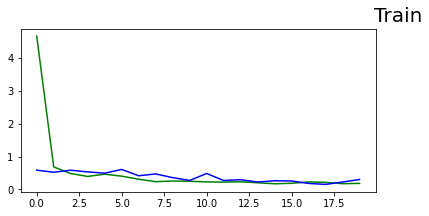

<Figure size 432x288 with 0 Axes>

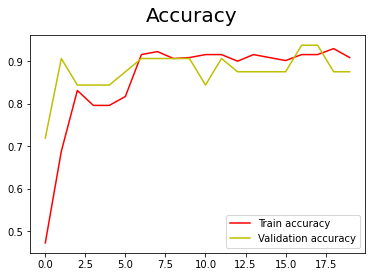

In [22]:
#Eğitim çıktıları 

plt.figure(figsize=(14,3))
plt.subplot(1,2,1)

print(hist.history.keys())
plt.plot(hist.history["loss"],color='g',label = "Train Loss") #loss: Train verisi üzerindeki hata oranı
plt.plot(hist.history["val_loss"], color='b',label = "Validation Loss") #val_loss: test datasına göre hata oranı
plt.suptitle('Train',fontsize=20)


plt.figure()

plt.show()

plt.figure()
plt.plot(hist.history["accuracy"],color='r',label = "Train accuracy")  #Accuracy: Train verisi üzerindeki doğruluk oranı 
plt.plot(hist.history["val_accuracy"],color='y', label = "Validation accuracy")  #val_accurasy: test datasına göre doğruluk oranı
plt.suptitle('Accuracy',fontsize=20)
plt.legend()




plt.show()

In [23]:
model.count_params()

17428290

In [24]:
#gerekli kütüphanler için gereken işlemler
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

#Dosyadan resim yükleme kısmı
image = load_img(train_dir + "Roman/Roman_8.jpg", target_size=(224, 224))

#image/resim dosyalarını sayısal bir diziye dönüştürür(numpy array)
image = img_to_array(image)

# model için verileri yeniden şekillendirme
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

#image/resmi Vgg modeli için hazırlıyoruz
image = preprocess_input(image)

#modeli yüküyoruz
model = VGG16()

#tüm çıktı sınıflarındaki olasılığı tahmin etmek için kullanıyoruz
yhat = model.predict(image)

#olasılıkları sınıf etiketlerine dönüştürme işlemi için
label = decode_predictions(yhat)

#en olası sonucu al, ör. en yüksek olasılık
label = label[0][0]

# sınıflandırmayı yazdır
print('%s (%.2f%%)' % (label[1], label[2]*100))

40960/35363 [==================================] - 0s 0us/step
jersey (14.40%)


In [25]:
model.count_params()

138357544